In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [111]:
smarket = pd.read_csv('data/Smarket.csv', index_col=0).reset_index().drop(columns='index', axis=1)
smarket.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up

In [112]:
smarket_train = smarket[smarket['Year']<2005]
smarket_test = smarket[smarket['Year']>=2005]
x_train, y_train = smarket_train[['Lag1', 'Lag2']], smarket_train['Direction']
x_test, y_test = smarket_test[['Lag1', 'Lag2']], smarket_test['Direction']

In [113]:
knn_1 = KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)
knn_1_pred = knn_1.predict(x_test)

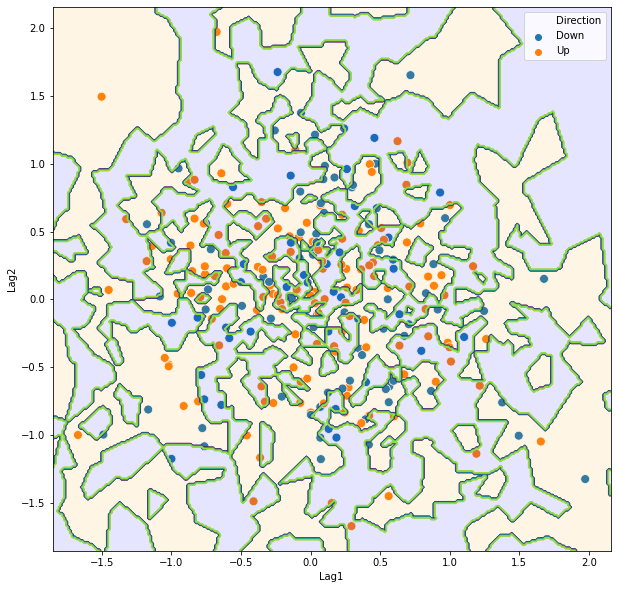

In [114]:
# Scatter plot
plt.figure(figsize=(10,10))
sb.scatterplot(data=x_test, x='Lag1', y='Lag2', hue=y_test, s=80)
# Prepare X, Y, Z for grid plot
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
X = np.linspace(x_min, x_max, 300)
Y = np.linspace(y_min, y_max, 300)
X, Y = np.meshgrid(X, Y)
Z_pred = knn_1.predict(np.c_[X.ravel(), Y.ravel()])
Z = np.array([1 if x == 'Down' else 0 for x in Z_pred]).reshape(X.shape)
# Create KNN Boundary & area color
plt.contour(X, Y, Z, linewidth=0.3, color='k')
plt.contourf(X, Y, Z, 1, alpha=0.1, colors=('orange', 'blue'))
plt.show()

In [115]:
knn_3 = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
knn_3_pred = knn_3.predict(x_test)

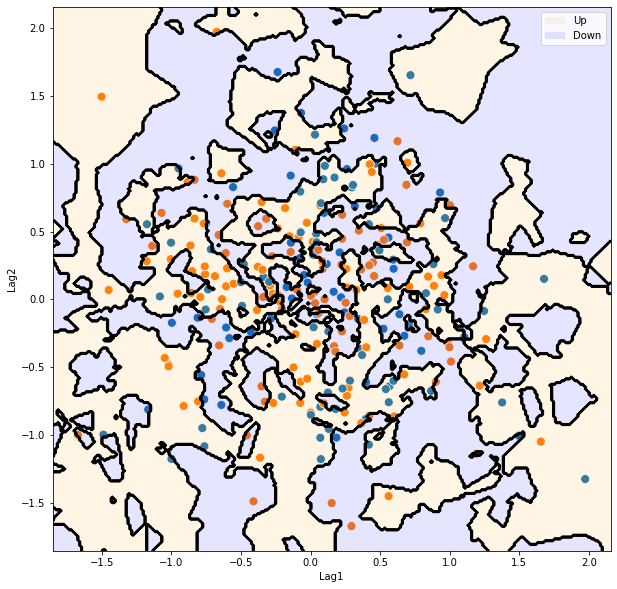

In [116]:
# Scatter plot
plt.figure(figsize=(10,10))
sb.scatterplot(data=x_test, x='Lag1', y='Lag2', hue=y_test, s=80)
# Prepare X, Y, Z for grid plot
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
X = np.linspace(x_min, x_max, 300)
Y = np.linspace(y_min, y_max, 300)
X, Y = np.meshgrid(X, Y)
Z_pred = knn_3.predict(np.c_[X.ravel(), Y.ravel()])
Z = np.array([1 if x == 'Down' else 0 for x in Z_pred]).reshape(X.shape)
# Create KNN Boundary & area color
plt.contour(X, Y, Z, linewidth=0.3, colors='k')
cs = plt.contourf(X, Y, Z, 1, alpha=0.1, colors=('orange', 'blue'))
color, lb = cs.legend_elements()
plt.legend(color, ['Up','Down'])
plt.show()

In [117]:
np.mean(knn_1_pred==y_test)

0.5

In [118]:
np.mean(knn_3_pred==y_test)

0.5317460317460317

In [119]:
pd.DataFrame(confusion_matrix(knn_1_pred, y_test, labels=['Up', 'Down']), ['Pred Up', 'Pred Down'], ['Up', 'Down'])

Up  Down
Pred Up    83    68
Pred Down  58    43

In [120]:
print(classification_report(y_test, knn_3_pred))

              precision    recall  f1-score   support

        Down       0.47      0.43      0.45       111
          Up       0.58      0.61      0.59       141

    accuracy                           0.53       252
   macro avg       0.52      0.52      0.52       252
weighted avg       0.53      0.53      0.53       252



In [121]:
# Why standardise? Because KNN classifier classifies variables of different sizes, in which distances may vary on an absolute scale (e.g. we might be classifying a variable based on house prices (where the distances could be in '000s of £ and age, where the distances could be a few years). Standardisation ensures that these distances are accounted for and there "standardised".

In [122]:
data = smarket[['Lag1', 'Lag2']]
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [123]:
scaled_data = scaler.transform(data)
scaled_data = pd.DataFrame(scaled_data, columns= data.columns)
scaled_data.head()

Lag1      Lag2
0  0.332058 -0.172491
1  0.840930  0.331988
2  0.905199  0.840869
3 -0.551867  0.905140
4  0.537191 -0.551950

In [124]:
x_train_s = scaled_data[smarket['Year']<2005]
x_test_s = scaled_data[smarket['Year']>=2005]

In [125]:
knn_s = KNeighborsClassifier(n_neighbors=3).fit(x_train_s, y_train)
knn_s_pred = knn_s.predict(x_test_s)
np.mean(knn_s_pred==y_test)

0.5317460317460317

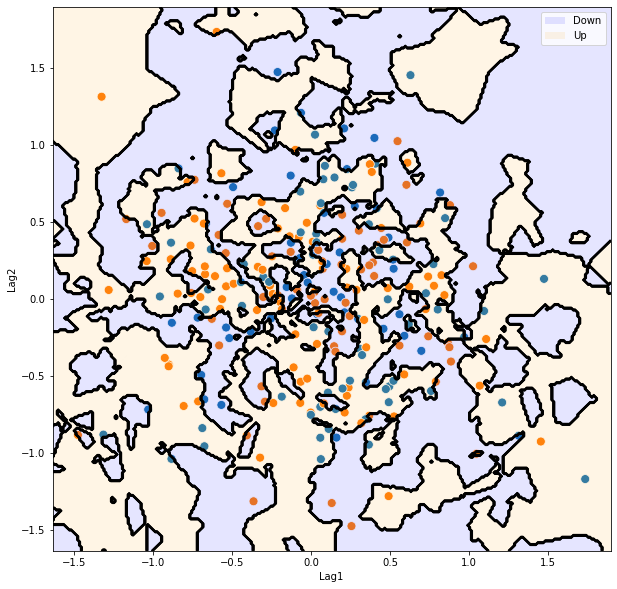

In [130]:
# Scatter plot
plt.figure(figsize=(10,10))
sb.scatterplot(data=x_test_s, x='Lag1', y='Lag2', hue=y_test, s=80)
# Prepare X, Y, Z for grid plot
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
X = np.linspace(x_min, x_max, 300)
Y = np.linspace(y_min, y_max, 300)
X, Y = np.meshgrid(X, Y)
Z_pred = knn_s.predict(np.c_[X.ravel(), Y.ravel()])
Z = np.array([0 if x == 'Down' else 1 for x in Z_pred]).reshape(X.shape)
# Create KNN Boundary & area color
plt.contour(X, Y, Z, linewidth=0.3, colors='k')
cs = plt.contourf(X, Y, Z, 1, alpha=0.1, colors=('blue', 'orange'))
color, lb = cs.legend_elements()
plt.legend(color, ['Down', 'Up'])
plt.show()

In [127]:
print(classification_report(y_test, knn_s_pred))

              precision    recall  f1-score   support

        Down       0.47      0.43      0.45       111
          Up       0.58      0.61      0.59       141

    accuracy                           0.53       252
   macro avg       0.52      0.52      0.52       252
weighted avg       0.53      0.53      0.53       252



In [129]:
# Standardise not help in this case
knn_1.classes_

array(['Down', 'Up'], dtype=object)